# Assignment 2: Rare Class Classification of Images - Mudd 2nd Floor
## EECS E6691 2025 Spring

## <font color="red"><strong>TODO:</strong></font> [**REPLACE EVERYTHING INSIDE THE [] BRACKETS WITH YOUR KAGGLE TEAM NAME (See more details in the "Evaluate your model (Kaggle)") later**]

## Introduction

<font color="red"><strong>NOTE:</strong></font> This assignment can be done in groups of 2-3 students. Please form a team as soon as possible.

You will work with a dataset of images of street traffic captured at the 120th Amsterdam Ave. and 120th Street intersection. Your task is to identify rare classes and situations that have potential to disrupt traffic flow or cause harm to pedestrians.

You need to experiment with the dataset extensively and explore advanced deep learning methods and techniques. In particular, you will work on a "multi-label" classification task (also known as "image tagging") on a dataset more complex than your typical Kaggle or benchmark (such as Pascal-VOC and ImageNet) datasets.

<font color="red"><strong>NOTE:</strong></font> How you approach the classification problem and which models you use is rather **open-ended**, and we therefore **urge you to start early** and look for some potential methods of solving this assignment. You will need to do some literature search and search for models and methods online that suit our problem. Unlike introductory deep learning courses, simply loading and fine-tuning a CNN (such as a ResNet) from torchvision will likely not yield desirable results for this assignment.

However, before anything else, we'll describe the dataset and problem in greater detail.

## Dataset

In this assignment we will work with an image dataset collected by Prof. Kostic's research group, acquired from a stationary video camera located on the 2nd floor of the Mudd building observing the intersection at of the 120th Street and Amsterdam Avenue. The dataset consists of 1002 images in $4K$ resolution ($width: 3840  \times  length:2160$) captured in regular intervals throughout the day spanning from 12/22/2021 to 4/10/2022. This period encompasses several long-term traffic construction projects, providing scenes of stationary objects that occur in a continuous set of images. In addition to stationary objects, the images also contain a set of fine-grained objects and situations, such as "off-road parking", that are uncommon yet important to detect in everyday traffic settings. Combining these two sets yields highly imbalanced classes. Overall, the classes describe occurrences with potential to disrupt traffic flow or cause harm to pedestrians.

This dataset can serve as a valuable asset for developing systems that can reliably foresee rare and dangerous street occurences and traffic events.


Of the 1,002 images in the dataset, we have provided you the labels for 100 of them.  We keep the labels for the remaining 902 images hidden, for purposes of in-class Kaggle competition that you will participate in.


The following table shows the frequency of classes within the provided "training" (or "development") set of 100 labeled images:
|Class Index | Class Name | # Samples |
| :--: | :- |:-: |
| 0  |Barricade           |  97 |
| 1  |Traffic cone        |  20 |
| 2  |Traffic barrel      |  95 |
| 3  |Scaffold            |  99 |
| 4  |Trailer truck       |  11 |
| 5  |Police car          |  5  |
| 6  |Ambulance           |  3  |
| 7  |Firecar             |  4  |
| 8  |Excavator           |  16 |
| 9  |Construction truck  |  8  |
| 10  |Car moving truck   |  1  |
| 11  |Offroad parking    |  3  |
| 12  |Construction car   |  5  |
| 13  |Construction worker|  3  |

Although not completely identical, the distribution of labels of the hidden test set is similar to what is shown in the table above.


There are several reasons as to why this dataset is  challenging to work with:
* Firstly, notice in the table above that even though our provided dataset consists of 100 labeled images, the numbers in the "# Samples" column sum to over 100. This is because we are dealing with a "multi-label" classification problem, where each image may consist of one or more (or none) of the provided classes, making this a more challenging classification task than your typical "multi-class" classification problem. In the figure below, you can see an example from our dataset containing the “Barricade”, “Traffic barrel”, “Scaffold”, “Police car”, “Ambulance”, and “Excavator” classes.
* Secondly, notice that the classes are highly imbalanced. Therefore, training a classifier on the provided data might be challenging due to some classes being seen much more frequent than others.
* Thirdly, our images are of $4K$ resolution, which is higher than images in a typical dataset found online. Open-source models trained on datasets such as ImageNet, might therefore not work out-of-the-box when applied to our images directly. Furthermore, due to the high-resolution, there is a lot of fine-grained information throughout the image, which may not be captured by models if you simply downsample the image before feeeding to the model input.
* The high-resolution also poses a challenge in that some classes are inherently smaller in size than others. Looking at the example image below, one would expect the "ambulance" and the "police car" to be easily identified due to their prominent size. On the other hand, classes such as "traffic barrel" are significantly more challenging to identify due to their small size.

<div style="text-align:center"><img src="./figures/example_image.jpg" width="900"/></div>

## Problem Formulation

You will work with a multi-label classification problem (also referred to as "image tagging" in the literature). At a high-level, your task is to build a deep learning pipeline to predict the presence of the 14 classes enumerated above for the provided dataset. You need to  develop a processing pipeline using 100 labeled images and perform inference on 902 unlabeled images. You need to  submit your inference predictions through the in-class Kaggle competition. A part of your grade will be based on your performance in the Kaggle competition. Recall that in multi-label classification each image can have none,  one, or several classes present in the image. You will have to think about how to perform this kind of classification when designing your own deep learning pipeline.


This assignment is **to be done in teams of 2-3 students**, so please connect with your classmates early.


How you use the 100 labeled images for developing your system is up to you. You can use them to train a model, or simply use them to evaluate more advanced techniques, such as zero-shot learning or few-shot learning. You will have to do some research online to find suitable models and methods, since simple models taught in introductory deep learning courses won't perform well on this problem and dataset.



At the end of this assignment, you need to write a three or more pages PDF report describing the methods you used to solve the assignment and other details outlined later in the assignment.

In summary, your tasks are as follows:
1. Form a group of 2-3 students
2. Complete data preparation code
3. Complete evaluation code to assess your models and methods
4. Explore and implement deep learning based methods (models) to perform classification on the given dataset
5. Evaluate your method on the 100 labeled training samples
6. Standardize your prediction into a given format
7. Update github multiple times
8. Evaluate your model on the 902 unlabeled images in the test set by submitting your predictions to Kaggle to participate in the in-class competition
9. Write a report of your work


<font color="red"><strong>NOTE:</strong></font> For more information about the dataset, how to approach this problem, grading criteria, and what to include in the report, please read through the previous and later sections of the assignment.

<font color="red"><strong>NOTE:</strong></font> When implementing the provided functions, please use the doc-strings as reference to what we expect from your implementation.

<font color="red"><strong>NOTE:</strong></font> Claim authorship of code developed on your own, by adding  several comment lines at the begining of a file. Comment your own code thoroughly and include links and citations to external material. When using online code, add comments which demonstrate understanding of the code modules.


## Downloading the Dataset
Download the dataset from the "E6691.2025Spring.Assignment2.Data" folder in the [root directory of the class Google Drive](https://drive.google.com/drive/folders/1tluDzQ-Fjvf7wXC_xWwIkpzsqBgheQnd?usp=sharing).

If you are using GCP (recommended), you will have to transfer the data over to your GCP instance.

After downloading the dataset, you should store the zipped file in the provided `data` folder in this repository. Here, you can unzip the file, which contains the following folder and files:
```  
├── 2ndFloorData
│   ├── images
│   │   ├── L2ndFloor-D-2022-04-10_T-00_30_02.jpg
│   │   └── ...
│   ├── provided_labels.json
│   └── classes.json
```  

<font color="red"><strong>NOTE:</strong></font> **DO NOT PUSH YOUR DATA TO YOUR GitHub REPOSITORY AND DO NOT SUBMIT THE DATASET TO GRADESCOPE**

<font color="red"><strong>NOTE:</strong></font> **YOU CANNOT SHARE THIS DATASET PUBLICLY**

## Data Setup (10 Points)

Before we can do analysis or processing, we need to setup and load the data. We have provided three functions to load the data and to split it into two sets: (1) training, (2) testing. Note that the "training" set is treated more as a "development" set, as you might not necessarily be training any models, but only use the samples for developing and testing your models.

<font color="red"><strong>TODO:</strong></font> Complete  functions `load_image_data`, `load_labels_and_classes`, and  `split_images_into_train_test` in `utils/data.py`

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils.data import load_image_data, load_labels_and_classes, split_images_into_train_test, sort_labels

IMAGE_DIR = "2ndFloorData/images"
LABEL_FILE = "2ndFloorData/provided_labels.json"
CLASSES_FILE = "2ndFloorData/classes.json"

image_file_paths = load_image_data(IMAGE_DIR)
labels, classes = load_labels_and_classes(LABEL_FILE, CLASSES_FILE)
labels = sort_labels(labels)

train_images, test_images = split_images_into_train_test(image_file_paths, labels)

Number of images path loaded: 1002
Number of images with label: 100


In [5]:
print(f"Number of training samples: {len(train_images)}")
print(f"Number of test samples: {len(test_images)}")

Number of training samples: 100
Number of test samples: 902


## Complete the Evaluation Code (5 Points)

Since we are dealing with highly imbalanced classes, we will evaluate our methods using the [balanced accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) defined as the average of recall obtained from each class

$$
\text{Balanced Accuracy} = \frac{1}{N} \sum_{i=1}^N \frac{TP_i}{TP_i + FN_i}
$$
where $N$ is the number of classes, $TP_i$ is the number of true positive for class $i$ and $FN_i$ is the number of false negative for class $i$.

However, since we're working with a multi-label classification problem, we cannot apply this metric naively. Instead, we treat each class as a binary classification problem (with $N=2$) with value 1 if the class is present in the image and 0 otherwise. We then compute the balanced accuracy for each class and compute the mean balanced accuracy across all classes to get a single aggregate score
$$
\text{Mean Balanced Accuracy} = \frac{1}{C} \sum_{j=1}^C \text{Balanced Accuracy}_j
$$
where $C$ is the number of classes we have in our dataset.

<font color="red"><strong>TODO:</strong></font> Complete  functions `convert_labels_to_multi_hot_encoding` in `utils/data.py` and `compute_balanced_accuracy` in `utils/metrics.py`. You will run `compute_balanced_accuracy` later in the assignment after implementing your own prediction method.

In [9]:
from utils.data import convert_labels_to_multi_hot_encoding

# Convert labels dict to multi-hot encoding
labels_multi_hot_encoding = convert_labels_to_multi_hot_encoding(labels, classes)
labels_multi_hot_encoding.shape

(100, 14)

In [11]:
labels_tobeused_ram = labels

In [13]:
labels['L2ndFloor-D-2021-12-22_T-22_00_01']
labels.keys()

dict_keys(['L2ndFloor-D-2021-12-22_T-22_00_01', 'L2ndFloor-D-2021-12-23_T-18_30_01', 'L2ndFloor-D-2021-12-22_T-22_30_01', 'L2ndFloor-D2020-06-17_T12-29-34', 'L2ndFloor-D-2021-12-23_T-00_00_01', 'L2ndFloor-D-2021-12-23_T-00_30_01', 'L2ndFloor-D-2021-12-23_T-03_00_01', 'L2ndFloor-D-2021-12-23_T-03_30_01', 'L2ndFloor-D-2021-12-23_T-14_00_01', 'L2ndFloor-D-2021-12-23_T-14_30_01', 'L2ndFloor-D-2021-12-23_T-18_00_01', 'L2ndFloor-D-2021-12-23_T-22_00_01', 'L2ndFloor-D-2021-12-23_T-22_30_02', 'L2ndFloor-D-2021-12-24_T-00_00_01', 'L2ndFloor-D-2021-12-24_T-00_30_01', 'L2ndFloor-D-2021-12-24_T-03_00_01', 'L2ndFloor-D-2021-12-24_T-03_30_01', 'L2ndFloor-D-2021-12-24_T-14_00_01', 'L2ndFloor-D-2021-12-24_T-14_30_01', 'L2ndFloor-D-2021-12-24_T-18_00_01', 'L2ndFloor-D-2021-12-24_T-18_30_01', 'L2ndFloor-D-2021-12-24_T-22_00_01', 'L2ndFloor-D-2021-12-24_T-22_30_01', 'L2ndFloor-D-2021-12-25_T-00_00_01', 'L2ndFloor-D-2021-12-25_T-00_30_01', 'L2ndFloor-D-2021-12-25_T-03_00_01', 'L2ndFloor-D-2021-12-25_T-03_

## Visualize Data

Sample from class barricade:


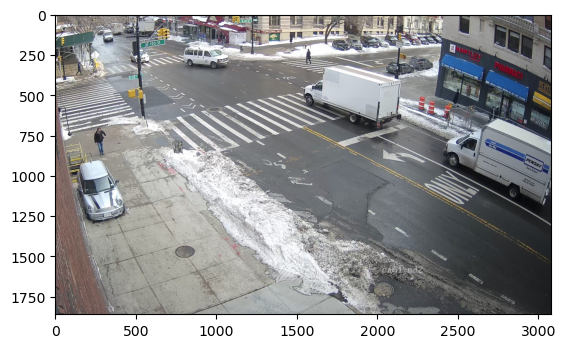

Sample from class traffic cone:


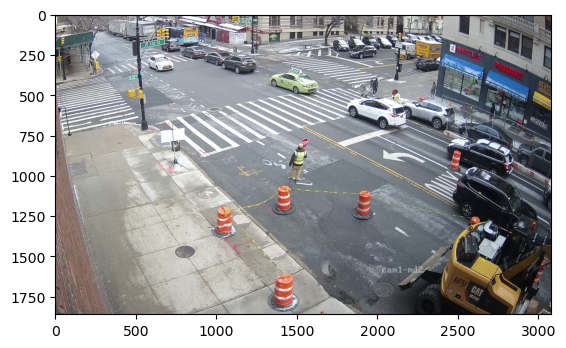

Sample from class traffic barrel:


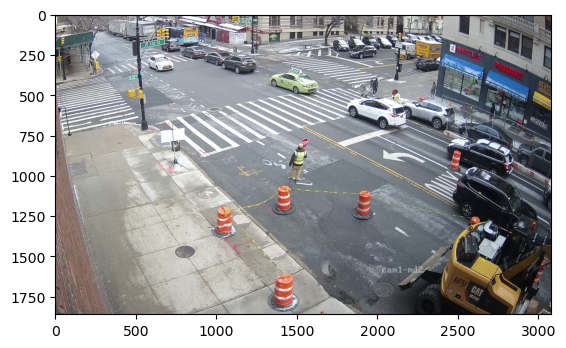

Sample from class scaffold:


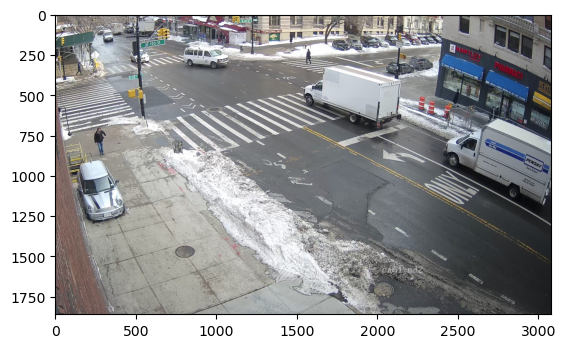

Sample from class trailer truck:


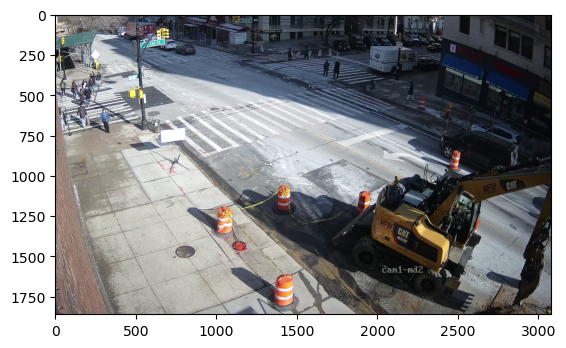

Sample from class police car:


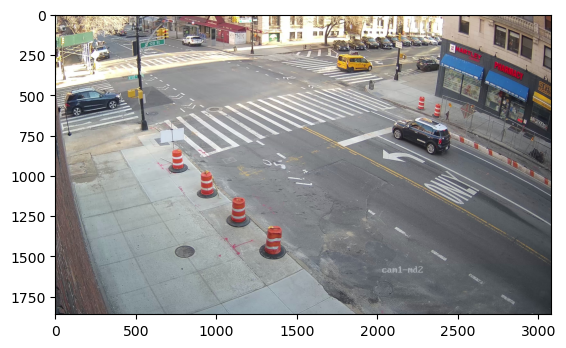

Sample from class firecar:


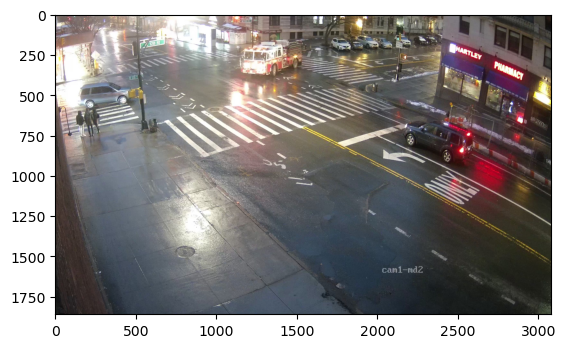

Sample from class excavator:


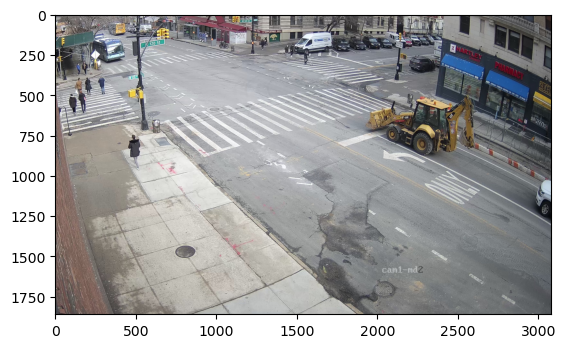

Sample from class construction truck:


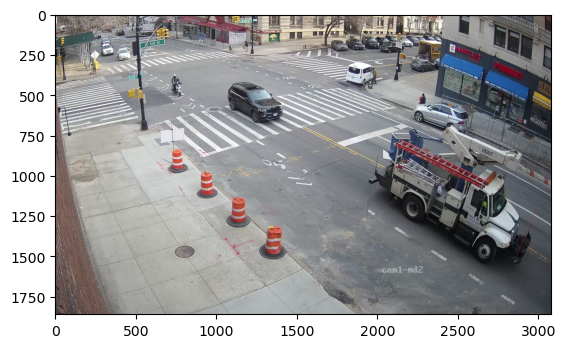

Sample from class offroad parking:


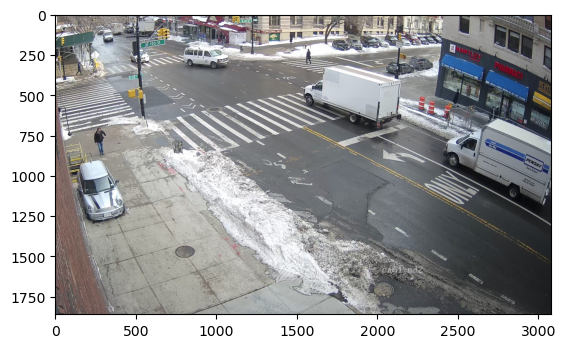

Sample from class construction car:


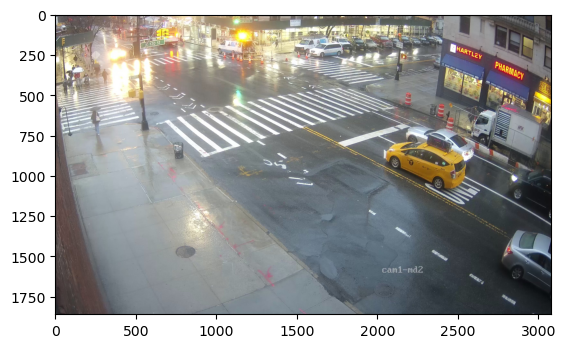

Sample from class construction worker:


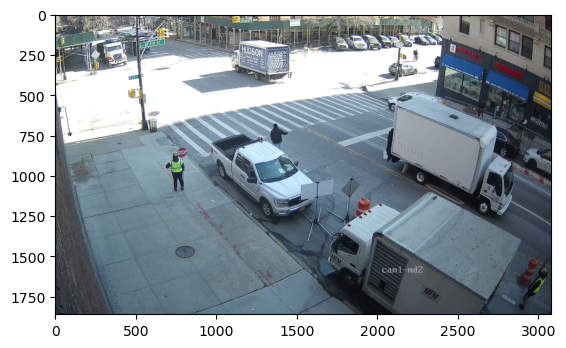

In [16]:
from matplotlib import pyplot as plt
import random
from utils.data import load_image

for i in classes:
    for j in train_images:
        fp, label = j['img'], j['labels']
        if int(i) in label and random.random() < 0.5:
            print(f"Sample from class {classes[i]}:")
            img, _ = load_image("2ndFloorData/images", fp)
            plt.imshow(img)
            plt.show()
            break;

## Test Sahi YoloV11

In [36]:
from sahi.utils.file import download_from_url
from sahi.utils.ultralytics import download_yolo11n_model

# Download YOLO11 model
model_path = "models/yolo11x-seg.pt"
download_yolo11n_model(model_path)

'models/yolo11x-seg.pt'

In [57]:
from sahi import AutoDetectionModel

detection_model = AutoDetectionModel.from_pretrained(
    model_type="ultralytics",
    model_path=model_path,
    confidence_threshold=0.3,
    device="cpu",  # or 'cuda:0'
)

from sahi.predict import get_prediction
from PIL import Image

def read_image(image_path):
    return Image.open(image_path)

# With an image path
result = get_prediction("figures/example_image.jpg", detection_model)

# With a numpy image
result_with_np_image = get_prediction(read_image("figures/example_image.jpg"), detection_model)

result.export_visuals(export_dir="demo_data/")


############### Hierarchy

from sahi.predict import get_sliced_prediction

result = get_sliced_prediction(
    "figures/example_image.jpg",
    detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

# Access the object prediction list
object_prediction_list = result.object_prediction_list

# Convert to COCO annotation, COCO prediction, imantics, and fiftyone formats
result.to_coco_annotations()[:3]
result.to_coco_predictions(image_id=1)[:3]
result.to_imantics_annotations()[:3]
result.to_fiftyone_detections()[:3]

result.export_visuals(export_dir="demo_data2/")

Performing prediction on 209 slices.


## Test on the data

In [ ]:
# Custom slicing function
from sahi.slicing import slice_image

slice_image_result = slice_image(
        image=img,
        output_file_name=None,
        output_dir=None,
        slice_height=256,
        slice_width=256,
        overlap_height_ratio=0.2,
        overlap_width_ratio=0.2,
        auto_slice_resolution=True,
    )

In [ ]:
from sahi.utils.file import download_from_url
from sahi.utils.ultralytics import download_yolo11n_model

# Download YOLO11 model
model_path = "models/yolo11x-seg.pt"
download_yolo11n_model(model_path)

from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction

detection_model = AutoDetectionModel.from_pretrained(
    model_type="ultralytics",
    model_path=model_path,
    confidence_threshold=0.3,
    device="cpu",  # or 'cuda:0'
)

for item in train_images[66:69]:
    fp, label = item['img'], item['labels']
    img = load_image("2ndFloorData/images", fp)

    for i in range(len(label)):
        if label[i] == 1:
            print(f"Label: {classes[f'{i}']}")

    result = get_sliced_prediction(
        img,
        detection_model,
        slice_height=512,
        slice_width=512,
        overlap_height_ratio=0.2,
        overlap_width_ratio=0.2,
        postprocess_match_threshold=0.1,
    )
    result.export_visuals(export_dir="demo_data2", hide_labels=False)

    
    break;

In [28]:
feature_space = [];

In [ ]:
import torch
from sahi import AutoDetectionModel
from tqdm import tqdm
import numpy as np

model_path = "models/yolo11x-seg.pt"
detection_model = AutoDetectionModel.from_pretrained(
    model_type="ultralytics",
    model_path=model_path,
    confidence_threshold=0.3,
    device="cpu",
)

print(len(feature_space))
with torch.no_grad():
    for ind2, item in tqdm(enumerate(train_images)):
        if len(feature_space) > ind2:
            print("Skipping")
            continue;
        img, label = item['img'], item['labels']

        print(f"img size: {img.shape}")
        print(f"label: {label}")

        width, height = img.shape[1], img.shape[0]

        for i in range(len(classes)):
            # print(i)
            if i in label:
                print(f"Label: {classes[f'{i}']}")
        try:
            result = get_sliced_prediction(
                img,
                detection_model,
                slice_height=512,
                slice_width=512,
                overlap_height_ratio=0.2,
                overlap_width_ratio=0.2,
            )
        except:
            print("Adjusting threshold")
            postprocess_match_threshold = 0.5;
            done = False
            while not done:
                try:
                    if postprocess_match_threshold < 0.1:
                        break;
                    result = get_sliced_prediction(
                        img,
                        detection_model,
                        slice_height=512,
                        slice_width=512,
                        overlap_height_ratio=0.2,
                        overlap_width_ratio=0.2,
                        postprocess_match_threshold=postprocess_match_threshold,
                    )
                    done = True
                except:
                    print("Failed")
                    postprocess_match_threshold -= 0.1;
            if not done:
                print("Failed")
                feature_space.append(np.zeros((100, 6)))
                continue;
        
        feature = np.zeros((100, 6))

        for ind, obj in enumerate(result.object_prediction_list):
            xt, yt, xb, yb = obj.bbox.to_xyxy()
            xt, yt, xb, yb = xt/width, yt/height, xb/width, yb/height
            feature[ind,:] = [xt, yt, xb, yb, obj.score.value, obj.category.id / 80];
        
        feature_space.append(feature)

In [15]:
np.array(feature_space)
np.save("feature_space.npy", np.array(feature_space))

## Explore and Build Your Own Model(s) (30 Points)

You need to build your own system(s) (pipelines/models/methods) to perform multi-label classification on the dataset you have prepared. Use the 100 labeled images as your development set to implement a pipeline to perform classification on the 902 unlabeled images. You will need to write your own custom code for this part, but you can use the methods you implemented in the previous part of the assignment.

After developing your system, you will perform prediction on the 902 test images without labels, and submit your results to Kaggle after joining the class Kaggle competition (see the next sections for more details regarding the format of the results, how to submit your results, and how the results are graded). Try out several methods and submit as many times as you want (max 20 submissions per day).

Unless you have a clear idea on how to tackle this problem from the get-go, this part will require you to do some research online to look for methods and models beyond what you typically explore in introductory deep learning classes.

Provide a link or citations to every model you try.

Here are some tips you can take into consideration when building your system. You do not have to follow every point, but the tips might be helpful to get you started:
* <font color="red"><strong>NOTE:</strong></font> Remember that you are dealing with a multi-label classification problem. Many models do not solve this problem out-of-the-box. You might need to think about how to design/adapt your models to predict several labels per image at the same time. However, some models do predict multiple classes at the same time, and in those cases, you might not have to do any modifications.
* Since the labeled dataset is so small, techniques such as **Zero-shot learning** or **Few-shot learning** might be good choices for this task.
* Try different types of models. Even though we are dealing with a classification task, (zero-shot) object detection models might still work well if used properly.
* Also, feel free to look beyond just classification models. Maybe generative models could be of use?
* Again, since the labeled dataset is small, training a typical CNN classifier with so few images might not be feasible. However, feel free to try to train (or fine-tune) some models and see what results you get, and  to go beyond  models you find on torchvision. E.g., you can look for other classification models on Huggingface.
* Remember, the dataset is highly imbalanced. Naively training a classifier might cause the model to be extremely biased. If you decide to train anything, please be careful of this fact.
* Furthermore, the images are of $4K$ resolution. Typical large-scale datasets are not this high-resolution, so naively feeding the images into a pre-trained model as is might not work well. Consider some of the following ideas:
    * Can you resize the images before feeding them into the model?
    * Can you perform some sort of sliding window approach?
    * Is there any way to (automatically) focus on specific smaller parts of the image that might be more interesting than others for classification? If so, how can this be done?
* You can try combining different models together into a single pipeline to see if that can help.
* Communicate with others in your team.
* Be creative!

### Grading
This part of the assignment is graded based on (weighted equally):
* **Clarity of code** - Is the code well structured and commented? (This is also important for the final project)
* **Correctness** - Does the model / whole pipeline solve the presented problem (multi-class classification)?
* **Effort** - Have you put a genuine effort into the assignment? (e.g., a submission with five different poorly performing methods will be graded more favourably than one with a single method that did not perform well). We expect you to try out more advanced methods to score well here. I.e., simply loading and fine-tuning an out-of-the-box ResNet from torchvision will not be sufficient (unless you do modifications to it, or use it in a larger pipeline).
    
<font color="red"><strong>TODO:</strong></font> Implement your custom pipeline in the cells below. Feel free to make as many new cells as you'd like. However, keep all the cells with relevant code between this current cell and the `## KEEP YOUR CODE ABOVE THIS CELL!` cell below.

<font color="red"><strong>NOTE:</strong></font> You must use PyTorch as your deep learning framework for this part of the assignment. The models you run must use PyTorch. However, you are free to combine it with other libraries, such as scikit-learn and transformers (Huggingface) if it is relevant.

<font color="red"><strong>NOTE:</strong></font> Clearly comment your code to make it easy to follow.

<font color="red"><strong>NOTE:</strong></font> Remember to give attribution to sources you use. Add links and citations to methods and models you use as comments when they are applied. Also include them in your report.  

<font color="red"><strong>NOTE:</strong></font> Feel free to try several different methods.

<font color="red"><strong>NOTE:</strong></font> If you find yourself stuck on this part, please come to TA's office hours to discuss approaches and implementations. We will be much more helpful in person than on EdStem for this assignment.

<font color="red"><strong>NOTE:</strong></font> START EARLY! This part of the assignment will take a lot of time to get right, and you most likely will not be able to complete it within 5-6 days only.


## Training with EfficientNet

In [18]:
#####################################################################################
# --------------------------- YOUR IMPLEMENTATION HERE ---------------------------- #
#####################################################################################
import timm
from torchvision import transforms
import torch
from PIL import Image
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Load pretrained Efficient model
NUM_CLASSES = 14
model = timm.create_model("tf_efficientnet_b3", pretrained=True)
model.classifier = nn.Sequential(nn.Dropout(0.4), nn.Linear(model.classifier.in_features, NUM_CLASSES))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

class CustomDataset(Dataset):
    def __init__(self, images, labels=None, transform=None, use_original=True, evaluate=False):
        """
        :param images: List of dicts containing image NumPy arrays (e.g., [{"img": np.array(...)}])
        :param labels: Multi-hot encoded labels (size: [100, 14])
        :param transform: Torchvision transforms for augmentation
        """
        self.images = images
        self.evaluate = evaluate
        self.transform = transform
        self.use_original = use_original
        
        if self.evaluate==False:
            self.labels = torch.tensor(labels, dtype=torch.float32)  
        
        if self.use_original:
            self.images = self.images * 2  
            self.labels = torch.cat([self.labels, self.labels], dim=0)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_fp = self.images[idx]["img"]  # Extract NumPy image
        img_array, _ = load_image("2ndFloorData/images", img_fp)
        img_pil = Image.fromarray(img_array.astype('uint8')) 

        resize_transform = transforms.Resize((224, 224)) 
        img_pil = resize_transform(img_pil)

        if self.use_original and idx >= len(self.images) // 2:
            img_pil = self.transform(img_pil)
        else:
            to_tensor = transforms.ToTensor()
            img_pil = to_tensor(img_pil)
        
        if self.evaluate == False:
            label = self.labels[idx]
        else: label = 1

        return img_pil, label



transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])
#####################################################################################
# --------------------------- END YOUR IMPLEMENTATION ----------------------------- #
#####################################################################################

model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

In [20]:
# Make more cells if needed
dataset = CustomDataset(train_images, labels_multi_hot_encoding, transform=transform, use_original=True, evaluate=False)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=5, shuffle=True)

In [22]:
from torch.nn import BCEWithLogitsLoss
from torch import tensor

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = BCEWithLogitsLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)  # Prevents NaN issues
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

        return F_loss.mean() if self.reduction == 'mean' else F_loss.sum()

In [24]:
# Make more cells if needed
from tqdm import tqdm
import numpy as np


# Count how many times each class appears across all samples
class_counts = np.sum(labels_multi_hot_encoding, axis=0)  # Sum along the batch axis
total_samples = labels_multi_hot_encoding.shape[0]
print(class_counts)

# Compute inverse frequency weights (more weight to rarer classes)
class_weights = total_samples / (class_counts + 1e-6)  # Avoid division by zero

# Normalize to keep values within a reasonable range
class_weights = class_weights / np.sum(class_weights)

# Convert to PyTorch tensor
class_weights = torch.tensor(class_weights*2, dtype=torch.float32).to(device)


EPOCHS = 5
loss_fn = FocalLoss(alpha=class_weights, gamma=2)
criterion = loss_fn  # For multi-label classification
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)


for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images) 
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step() 

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {avg_loss:.4f}")

torch.save(model.state_dict(), "model_weights.pth")

[97. 20. 95. 99. 11.  5.  3.  4. 16.  8.  1.  3.  5.  3.]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:59<00:00,  1.48s/it]


Epoch 1/5, Loss: 0.0143


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [01:04<00:00,  1.62s/it]


Epoch 2/5, Loss: 0.0063


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:57<00:00,  1.43s/it]


Epoch 3/5, Loss: 0.0052


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:57<00:00,  1.44s/it]


Epoch 4/5, Loss: 0.0048


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:57<00:00,  1.45s/it]


Epoch 5/5, Loss: 0.0043


### Using ROC Curve to find optimal thresholds for each class (EfficientNet)

In [26]:
import numpy as np
import torch
from tqdm import tqdm
from sklearn.metrics import roc_curve

model.eval()
all_preds = []
all_labels = []

eval_dataset = CustomDataset(train_images, labels_multi_hot_encoding, use_original=False)
eval_loader = torch.utils.data.DataLoader(eval_dataset, batch_size=1, shuffle=False)

with torch.no_grad():
    for images, labels in tqdm(eval_loader):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        preds = torch.sigmoid(outputs).cpu().numpy()  # Convert logits to probabilities
        labels_np = labels.cpu().numpy()

        all_preds.append(preds)
        all_labels.append(labels_np)

# Convert lists to numpy arrays
all_preds = np.vstack(all_preds)  # Shape: (num_samples, num_classes)
all_labels = np.vstack(all_labels)  # Shape: (num_samples, num_classes)

# Store the best thresholds for each class
best_thresholds = []

print("\nFinding Optimal Thresholds using ROC Curve...")
for class_idx in range(NUM_CLASSES):
    # Get true labels and predicted probabilities for the current class
    y_true = all_labels[:, class_idx]
    y_scores = all_preds[:, class_idx]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    #J = TPR - FPR
    J_scores = tpr - fpr
    best_idx = np.argmax(J_scores)  
    best_threshold = thresholds[best_idx]  # Select the best threshold

    best_thresholds.append(best_threshold)

    print(f"Class {class_idx}: Optimal Threshold = {best_threshold:.4f}")


best_thresholds = np.array(best_thresholds)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.80it/s]


Finding Optimal Thresholds using ROC Curve...
Class 0: Optimal Threshold = 0.7884
Class 1: Optimal Threshold = 0.4016
Class 2: Optimal Threshold = 0.7350
Class 3: Optimal Threshold = 0.7900
Class 4: Optimal Threshold = 0.3711
Class 5: Optimal Threshold = 0.3626
Class 6: Optimal Threshold = 0.4832
Class 7: Optimal Threshold = 0.3524
Class 8: Optimal Threshold = 0.3658
Class 9: Optimal Threshold = 0.4169
Class 10: Optimal Threshold = 0.6456
Class 11: Optimal Threshold = 0.4443
Class 12: Optimal Threshold = 0.3259
Class 13: Optimal Threshold = 0.3932


In [34]:
all_preds = np.array(all_preds, dtype=np.float32)
preds_effnet = (all_preds > best_thresholds).astype(np.float32)
print(preds_effnet[20])

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [36]:
  # Threshold for binary classification
print(labels_multi_hot_encoding[20])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [32]:
import numpy as np
from utils.metrics import compute_balanced_accuracy

# Compute the balanced accuracy across all classes
mean_balanced_accuracy, accuracies = compute_balanced_accuracy(np.array(preds_effnet), labels_multi_hot_encoding)

print("Mean Balanced Accuracy (Computed over all classes):", mean_balanced_accuracy)
print('Balanced Accuracy Per Class:')
for class_idx, class_name in classes.items():
    print(f'{class_name}: {accuracies[int(class_idx)]}')

Mean Balanced Accuracy (Computed over all classes): 0.7492357243887516
Balanced Accuracy Per Class:
barricade: 0.525
traffic cone: 0.699125789218067
traffic barrel: 0.5568181818181818
scaffold: 0.515625
trailer truck: 0.7267441860465116
police car: 0.6762002042900919
ambulance: 0.9948979591836735
firecar: 0.6820652173913043
excavator: 0.6645628798503973
construction truck: 0.8410138248847927
car moving truck: 0.99
offroad parking: 0.9948979591836735
construction car: 0.6274509803921569
construction worker: 0.9948979591836735


/Users/kabirbagai/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


## Extract threshold of significance for RAM

For replicating RAM
1. Install the package as said in its repo
2. Download pretrained model weights with the link in RAM repo
3. Move ram_plus.py to package_folder/ram/models
4. Copy recognize-anything/Extract_Probabilities.ipynb to the same path and run it.
5. Use the code here to load the probabilities and generate predictions.

In [ ]:
import pickle
import numpy as np
from sklearn.metrics import f1_score
import csv

# Load probabilities
with open('out_ram.pkl', 'rb') as f:
    out_ram = pickle.load(f)

categories_ram = out_ram['L2ndFloor-D-2022-01-28_T-00_30_01.jpg'].keys()
categories_data = classes.values()

print(categories_ram)
print(categories_data)

# extract features for train data
probabilities = np.array([list(out_ram[i['img']+'.jpg'].values()) for i in train_images])

labels = []
for i in train_images:
    indices = i['labels']
    one_hot = np.zeros(14, dtype=int)
    one_hot[indices] = 1
    labels.append(one_hot)
labels = np.array(labels)

thresholds = np.linspace(0, 1, 100)
best_thresholds = []

# Find the best threshold for each class
for class_idx in range(14):
    best_f1 = 0
    best_t = 0.5 
    for t in thresholds:
        preds = (probabilities[:, class_idx] >= t).astype(int)
        f1 = f1_score(labels[:, class_idx], preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = t
    best_thresholds.append(best_t)

best_thresholds = np.array(best_thresholds)
print("Best thresholds per class:", best_thresholds)

detected_labels = {}
for i in out_ram:
    detected = np.array(list(out_ram[i].values())) > best_thresholds
    detected = detected.astype(int)
    detected_labels[i] = detected
    
len(detected_labels)

output_file = 'predicted_labels.csv'

# Generate Kaggle CSV file
with open(output_file, 'w', newline='') as f:
    writer = csv.writer(f)
    
    # Write header
    header = ['ID'] + [str(i) for i in range(14)]
    writer.writerow(header)
    
    # Write rows
    for filename, one_hot_vector in detected_labels.items():
        row = [filename.replace('.jpg', '')] + list(one_hot_vector)

        if filename.replace('.jpg', '') in [i['img']for i in train_images]:
            continue;        

        writer.writerow(row)

print(f"Saved predictions to {output_file}")

dict_keys([np.str_('Barricade'), np.str_('Traffic cone'), np.str_('Traffic barrel'), np.str_('Scaffold'), np.str_('Trailer truck'), np.str_('Police car'), np.str_('Ambulance'), np.str_('Firecar'), np.str_('Excavator'), np.str_('Construction truck'), np.str_('Car moving truck'), np.str_('Offroad parking'), np.str_('Construction car'), np.str_('Construction worker')])
dict_values(['barricade', 'traffic cone', 'traffic barrel', 'scaffold', 'trailer truck', 'police car', 'ambulance', 'firecar', 'excavator', 'construction truck', 'car moving truck', 'offroad parking', 'construction car', 'construction worker'])
Best thresholds per class: [0.58585859 0.92929293 0.54545455 0.         0.70707071 0.92929293
 0.95959596 0.74747475 0.55555556 0.78787879 0.76767677 0.48484848
 0.61616162 0.74747475]
Saved predictions to predicted_labels.csv


In [13]:
len(labels_tobeused_ram)

100

In [ ]:
detected_labels

In [25]:
predictions = []
for i in labels_tobeused_ram:
    label = detected_labels[i+'.jpg']
    predictions.append(label)

## KEEP YOUR CODE ABOVE THIS CELL!

## Evaluate your method on the whole training set of 100 labeled images in the following cells (5 Points)

<font color="red"><strong>TODO 2:</strong></font> After completing your code, please evaluate your method on the whole training set of 100 labeled images in the following cell using `compute_balanced_accuracy` function in `utils/metrics.py`.



### RAM Balanced Accuracy on Train Data

In [28]:
import numpy as np
from utils.metrics import compute_balanced_accuracy

# Compute the balanced accuracy across all classes
mean_balanced_accuracy, accuracies = compute_balanced_accuracy(np.array(predictions), labels_multi_hot_encoding)

print("Mean Balanced Accuracy (Computed over all classes):", mean_balanced_accuracy)
print('Balanced Accuracy Per Class:')
for class_idx, class_name in classes.items():
    print(f'{class_name}: {accuracies[int(class_idx)]}')

Mean Balanced Accuracy (Computed over all classes): 0.7748538624206038
Balanced Accuracy Per Class:
barricade: 0.875
traffic cone: 0.6524562394127611
traffic barrel: 0.9896907216494846
scaffold: 0.99
trailer truck: 0.7244964262508122
police car: 0.5961538461538461
ambulance: 0.8281786941580755
firecar: 1.0
excavator: 0.9444444444444444
construction truck: 0.5974124809741248
car moving truck: 1.0
offroad parking: 0.5190905190905191
construction car: 0.5520833333333334
construction worker: 0.5789473684210527


/Users/personalaccount/Desktop/HW/AdvDeepLearning/Assignment2_2/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


## Prepare for Kaggle - Convert predictions into desirable format (10 Points)

The previous section of this assignment required you to explore and implement methods and models of your choice to solve the given problem. This freedom makes it hard for us to evaluate your models. Therefore, we need you to convert your predictions on the test set (the 902 images) into a uniform format for submission to Kaggle. This way, we can evaluate your models using a single script, and you can participate in the class-wide Kaggle competition.

We want your predictions to be a CSV file with 15 columns. The first column should have `ID` as the header, while the other 14 columns should have 0 to 13 as headers. One row should represent the predictions for one image, and the `ID` for each image is simply the filename of the image. The class should map to the integer found in `classes.json`. I.e., `barricade` should have label `0`, `traffic cone` should be `1`, etc. Each of the 14 columns (with headers 0 to 13) should represent whether a class is predicted or not, with value 0 representing not present, and value 1 representing present.


An example of the correct format is as follows. If for image `L2ndFloor-D-2021-12-31_T-00_00_01`, we predict the presence of `barricade` (class 0), `traffic barrel` (class 2), `scaffold` (class 3), and `police car` (class 5), the CSV should be as follows:
```
ID, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13
L2ndFloor-D-2021-12-31_T-00_00_01, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0
```
And if we additionally have the predictions 0, 2, 3 for `L2ndFloor-D-2021-12-27_T-22_30_01`, we would simply add another row:
```
ID, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13
L2ndFloor-D-2021-12-31_T-00_00_01, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0
L2ndFloor-D-2021-12-27_T-22_30_01, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0
...
...
...
```
You should have 902 rows in your CSV file, each representing one of the 902 images.

This should then be saved as a .csv file and uploaded to Kaggle following the instructions in the next section of the assignment.



<font color="red"><strong>TODO:</strong></font> Complete the following function in the cell below to (1) convert your predictions into the desired format described above for Kaggle submission and (2) save the predictions to a .csv file.

<font color="red"><strong>TODO:</strong></font> When completing the functions, please fill out the doc strings where we have marked with TODO

In [123]:
import csv
import pandas as pd

def convert_predictions_to_kaggle_format_and_save_to_csv(save_dir, suggested_thresholds):
    """
    Converts your predictions into the desirable format as described above.
    You should save your predictions as a .csv file.

    args:
        TODO: After changing a,b,c,d to something meaningful that matches your predictions, describe your arguments!
        NOTE: One of the a,b,c,d
        TODO: Remove these two TODOs and the NOTE and replace it with your own args.
        HOWEVER: Keep the save_dir

        save_dir: Where to save the .csv file.


    returns:
        None
    """

    #####################################################################################
    # --------------------------- YOUR IMPLEMENTATION HERE ---------------------------- #
    #####################################################################################

    #TODO: Complete this code
    # You need to change the arguments of the function. E.g., replace a,b,c,d with proper variable names
    header = ["ID"] + [str(i) for i in range(14)]
    with open(f"{save_dir}/predictions.csv", 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
    
        test_dataset = CustomDataset(test_images, use_original=False, evaluate=True)
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

        with torch.no_grad():
            for i, (images, _) in tqdm(enumerate(test_loader)):
                images = images.to(device)

                outputs = model(images)
                preds = torch.sigmoid(outputs)  # Convert logits to probabilities
                image_name = test_images[i]["img"]

                preds_np = preds.cpu().numpy()
                preds_np = (preds_np > best_thresholds).astype(np.int32)
                
                df = pd.DataFrame(preds_np)

                pred_str = df.to_csv(header=False, index=False).strip()
                
                pred_csv = [image_name] + pred_str.split(',')
                writer.writerow(pred_csv)
    #####################################################################################
    # --------------------------- END YOUR IMPLEMENTATION ----------------------------- #
    #####################################################################################

convert_predictions_to_kaggle_format_and_save_to_csv("kaggle", suggested_thresholds)

902it [01:51,  8.06it/s]


## Evaluate your model (Kaggle) (10 Points)

With your predictions ready, you can now participate in the in-class Kaggle competition. This part does not contain any explicit coding, but only details regarding the Kaggle competition.

Kaggle is a platform for predictive modeling and analytics competitions in which companies and researchers post data and statisticians and data miners compete to produce the best models for predicting and describing the data.

If you don't have a Kaggle account, feel free to sign up at www.kaggle.com with your **Columbia EMAIL**. To let the TAs do the grading more conveniently, again, please use **Lionmail** to join Kaggle and make your team name a combination of all the group members UNI's: `UNI1-UNI2-UNI3` for your group to submit together.

The competition is located here: https://www.kaggle.com/t/608219c156cd48efa18ce7955c8ee07b

You can find detailed description about this in-class competition on the website above. Please read and follow the instructions carefully.

Your task is to submit the .csv file with predictions from the previous section to the Kaggle competition website. Your performance will be shown on the public leaderboard once you submit your prediction .csv file. The final ranking is based on the public leaderboard results.

You will be graded based on your results, so please try your best to get as high of a score as possible!

More specifically, you can receive between 0 and 10 points for this part of the assignment according to the following table:
| Balanced Accuracy| Grade points |
| :--: | :--: |
| 56-  | 0   |
| 56 - 57  | 1   |
| 57 - 58  | 2 |
| 58 - 59  | 3 |
| 59 - 60  | 4 |
| 60 - 61  | 5 |
| 61 - 62  | 6 |
| 62 - 63  | 7 |
| 63 - 64  | 8 |
| 64 - 65  | 9 |
| 65 +  | 10 |



Feel free to try out several methods and submit as many times as you want (max 20 submissions per day).

Kaggle team name **MUST** be `UNI1-UNI2-UNI3`

<font color="red"><strong>Note: </strong></font> You cannot change group after joining one - Kaggle won't let you.

<font color="red"><strong>TODO:</strong></font> kb3343_rs4613_af3410

## Write a report (20 Points)

Please write a 3 or more pages PDF report containing the following information:
1. Explanation and motivation for your approach
    * You need to discuss the following:
        * Examine some samples from the training set. What insights might be useful to develop your approach?
        * Which of the provided information about the dataset did you consider when choosing your method?
    * Please describe the methods and models you used, and include citations of work found online
    * Any other interesting insights that motivated your approach
2. Include a table summarizing the results from evaluations on the training set
    * These are the results from the `Evaluate your method on the whole training set of 100 labeled images in the following cells` section.
    * In your table, include the balanced accuracy for each class, and the mean balanced accuracy over all classes.
        * One row should represent one class or the mean balanced accuracy over all classes.
        * Optional, but you can also include rows summarizing the performance over a subset of classes.
        * One column should represent one model.
3. Discuss your results on the training set. You can, among other points, discuss the following:
    * What insights did you gain?
    * Are some classes easier to predict than others? Why do you think so?
    * Why are some classes harder than others?
    * How can you use these insights to improve your model/pipeline?
        * Did you implement these improvements? If so, how? And how did it affect your results?
4. Include your best resulting score (mean balanced accuracy) that you achieved from the Kaggle competition
5. Based on your results your Kaggle score, discuss your results and potential improvement strategies
    * Why do you think your model performed well / subpar?
    * Are the results similar to those from the training set?
    * Are there any insights from the training set that could have been the cause of your performance?
    * What could you do to improve your model and the performance?
6. Contribution by each student.
    * Add a table summarizing the contribution of each student and the percentage of work each student did.

The report PDF should be included in your GitHub repository.

## Final Submission (10 Points)

Finally, please carefully follow the submission instruction in the README.md.

<font color="red"><strong>TODO:</strong></font> Commit your changes regularly. <span style="color:red">***At least 3***</span> commits by each student on your progress of the assignment is required before submitting a final version.

<font color="red"><strong>TODO:</strong></font> Remember to include two PDFs in your GitHub repository (and make sure they're submitted to Gradescope)
1. PDF of this notebook
2. PDF of your report

# Good luck!